In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [8]:
df =pd.read_csv('../data/cleaned_student_data.csv')

Exploratory Data Analysis (EDA), where we'll start creating visualizations to uncover the stories hidden in the data and directly address the questions from the school administration.

The first and most fundamental question they asked was:

**"What are the distinct characteristics of our highest-achieving students versus our most at-risk students?"**

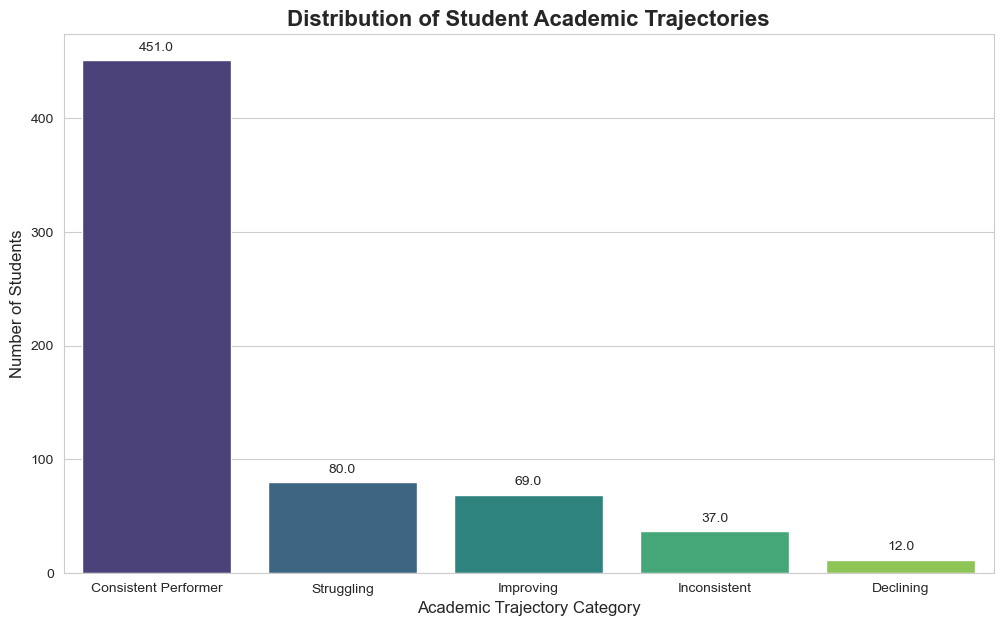


--- Initial Observations ---
The plot above shows the overall breakdown of student performance trends.
A significant portion of students (451) are performing well consistently.
However, a notable number are 'Struggling' (80) or 'Declining' (12). These are our key groups to analyze.


In [9]:
# --- Initial Analysis: Distribution of Academic Trajectories ---
# Before we compare groups, let's understand their size.

sns.set_style('whitegrid')
plt.figure(figsize=(12,7))

ax = sns.countplot(
        x='academic_trajectory', 
        data=df, 
        order=df['academic_trajectory'].value_counts().index, # Order bars by count
        palette='viridis'
    )
# Add labels to the bars for clarity
for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Distribution of Student Academic Trajectories', fontsize=16, fontweight='bold')
plt.xlabel('Academic Trajectory Category', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0) 

# Save the figure to our reports folder
figure_path = '../reports/figures/01_trajectory_distribution.png'
os.makedirs(os.path.dirname(figure_path), exist_ok=True)
plt.savefig(figure_path)
plt.show()

print("\n--- Initial Observations ---")
print("The plot above shows the overall breakdown of student performance trends.")
print(f"A significant portion of students ({df['academic_trajectory'].value_counts()['Consistent Performer']}) are performing well consistently.")
print(f"However, a notable number are 'Struggling' ({df['academic_trajectory'].value_counts()['Struggling']}) or 'Declining' ({df['academic_trajectory'].value_counts()['Declining']}). These are our key groups to analyze.")


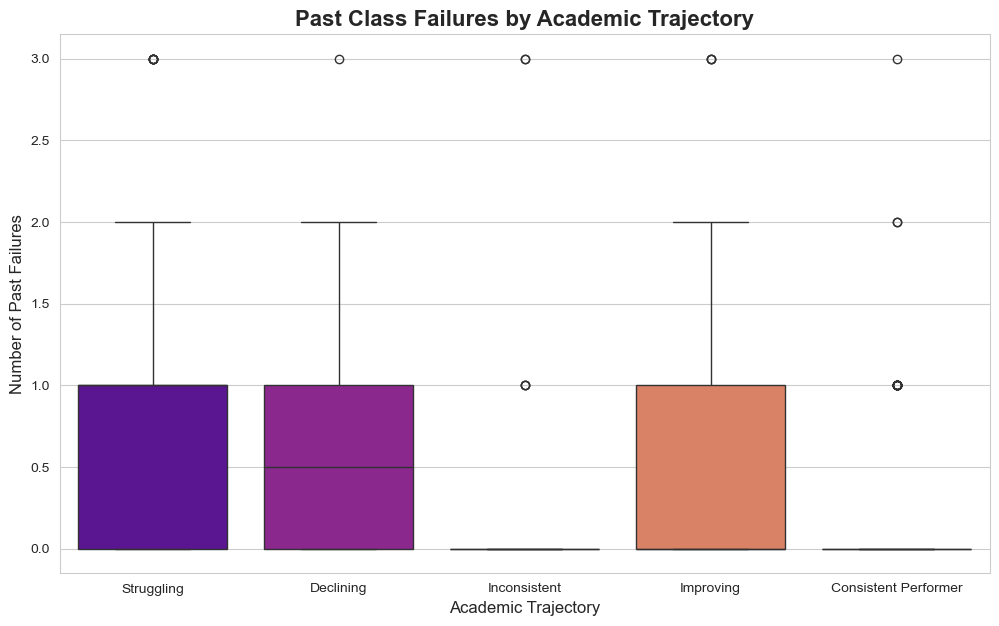

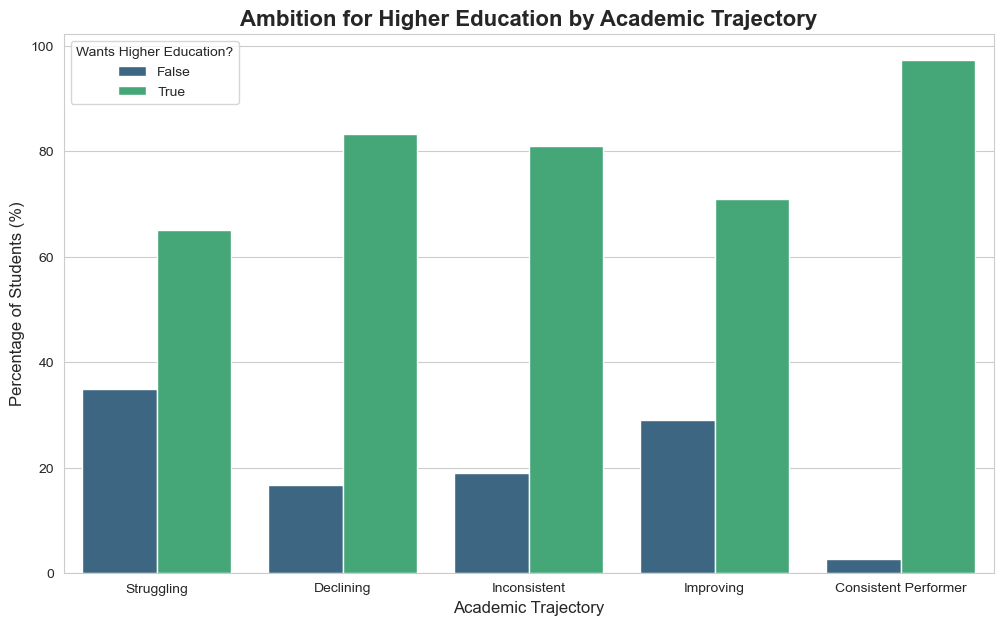

In [12]:
# My hypothesis is that 'Struggling' students will have more past failures and less ambition for higher education. Let's see if the data supports this.

# --- Visualization 1: Past Failures by Academic Trajectory ---
# We'll use a box plot to see the distribution of past failures for each group.
    

# Define a logical order for the academic trajectory categories for plotting
trajectory_order = ['Struggling', 'Declining', 'Inconsistent', 'Improving', 'Consistent Performer']

plt.figure(figsize=(12, 7))
sns.boxplot(x='academic_trajectory', y='failures', data=df, order=trajectory_order,palette='plasma')
    
plt.title('Past Class Failures by Academic Trajectory', fontsize=16, fontweight='bold')
plt.xlabel('Academic Trajectory', fontsize=12)
plt.ylabel('Number of Past Failures', fontsize=12)
    
# Save the figure
figure_path = '../reports/figures/02_failures_by_trajectory.png'
os.makedirs(os.path.dirname(figure_path), exist_ok=True)
plt.savefig(figure_path)
    
plt.show()

# ---  Visualization 2: Ambition for Higher Education ---
# We want to see the PROPORTION of students in each group who want to go to college.
# A 100% stacked bar chart is perfect for this comparison.

# First, calculate the percentage of students aspiring to higher education in each trajectory group.
prop_df = df.groupby('academic_trajectory')['higher'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
    
plt.figure(figsize=(12, 7))
sns.barplot(x='academic_trajectory', y='percentage', hue='higher', data=prop_df, order=trajectory_order,palette='viridis')

plt.title('Ambition for Higher Education by Academic Trajectory', fontsize=16, fontweight='bold')
plt.xlabel('Academic Trajectory', fontsize=12)
plt.ylabel('Percentage of Students (%)', fontsize=12)
plt.legend(title='Wants Higher Education?')
    
# Save the figure
figure_path = '../reports/figures/03_higher_ed_by_trajectory.png'
plt.savefig(figure_path)

plt.show()



**Insights:**

**Past Failures are a Critical Indicator**: The first chart (boxplot) clearly shows a strong relationship. The 'Struggling' and 'Declining' students have a significantly higher number of past failures compared to the 'Consistent Performers', who have almost none. This tells the administration that past failure is a major red flag for future performance.

**Ambition Drives Success:** The second chart (barplot) is just as revealing. Overwhelmingly, 'Consistent Performers' and 'Improving' students want to pursue higher education. In contrast, a much larger percentage of 'Struggling' students do not have this ambition. This suggests that a student's long-term goals are strongly linked to their current academic success.



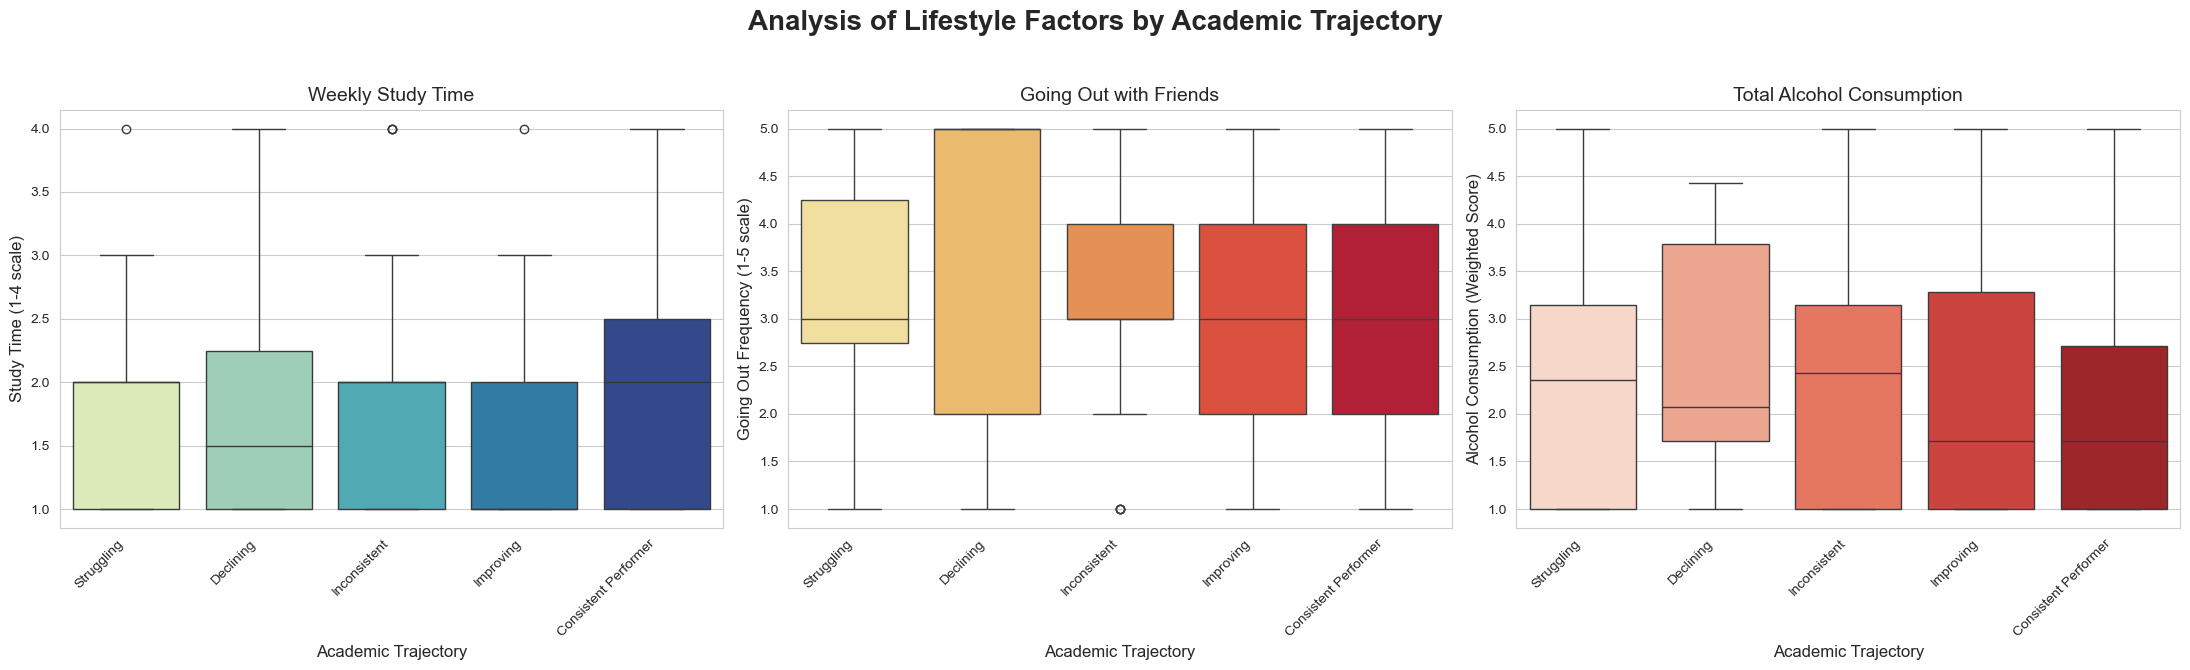

In [ ]:
 # --- 2. Create a Visualization for Lifestyle Factors ---
    # To present the information concisely, we'll create a single figure with three subplots.
    
fig, axes = plt.subplots(1, 3, figsize=(22, 7)) # 1 row, 3 columns of plots
fig.suptitle('Analysis of Lifestyle Factors by Academic Trajectory', fontsize=20, fontweight='bold')

# Plot 1: Study Time
sns.boxplot(ax=axes[0], x='academic_trajectory', y='studytime', data=df, order=trajectory_order, palette='YlGnBu')
axes[0].set_title('Weekly Study Time', fontsize=14)
axes[0].set_xlabel('Academic Trajectory', fontsize=12)
axes[0].set_ylabel('Study Time (1-4 scale)', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right') # Rotate labels to prevent overlap

# Plot 2: Going Out with Friends
sns.boxplot(ax=axes[1], x='academic_trajectory', y='goout', data=df, order=trajectory_order, palette='YlOrRd')
axes[1].set_title('Going Out with Friends', fontsize=14)
axes[1].set_xlabel('Academic Trajectory', fontsize=12)
axes[1].set_ylabel('Going Out Frequency (1-5 scale)', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Plot 3: Total Alcohol Consumption
sns.boxplot(ax=axes[2], x='academic_trajectory', y='total_alcohol', data=df, order=trajectory_order, palette='Reds')
axes[2].set_title('Total Alcohol Consumption', fontsize=14)
axes[2].set_xlabel('Academic Trajectory', fontsize=12)
axes[2].set_ylabel('Alcohol Consumption (Weighted Score)', fontsize=12)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for the suptitle
    
# Save the combined figure
figure_path = '../reports/figures/04_lifestyle_factors_by_trajectory.png'
os.makedirs(os.path.dirname(figure_path), exist_ok=True)
plt.savefig(figure_path)
    
plt.show()

**Insights from these Visualizations:**

**1. Study Time Matters, But Not as Much as Expected:** The first plot shows that 'Consistent Performers' do tend to study more than 'Struggling' students. However, the difference isn't dramatic. This is a subtle but important insight: simply telling students to "study more" might not be the most effective strategy. The quality of study might be more important than the quantity.

**2. Social Life and Performance:** The second plot reveals that 'Struggling' students tend to go out more frequently than 'Consistent Performers'. This suggests that finding a balance between social life and academic responsibilities is a key challenge for at-risk students.

**3. Alcohol Consumption is a Clear Differentiator:** The third plot shows the clearest trend. There is a visible, step-by-step increase in alcohol consumption as student performance declines. 'Struggling' students have the highest median alcohol consumption, while 'Consistent Performers' have the lowest. This provides strong evidence that high alcohol consumption is a significant risk factor.

We are building a very clear profile of these student groups. We've confirmed that past failures, low ambition, and lifestyle choices are all strongly correlated with poor academic outcomes.

**Next Step could be to investigate the impact of support systems**

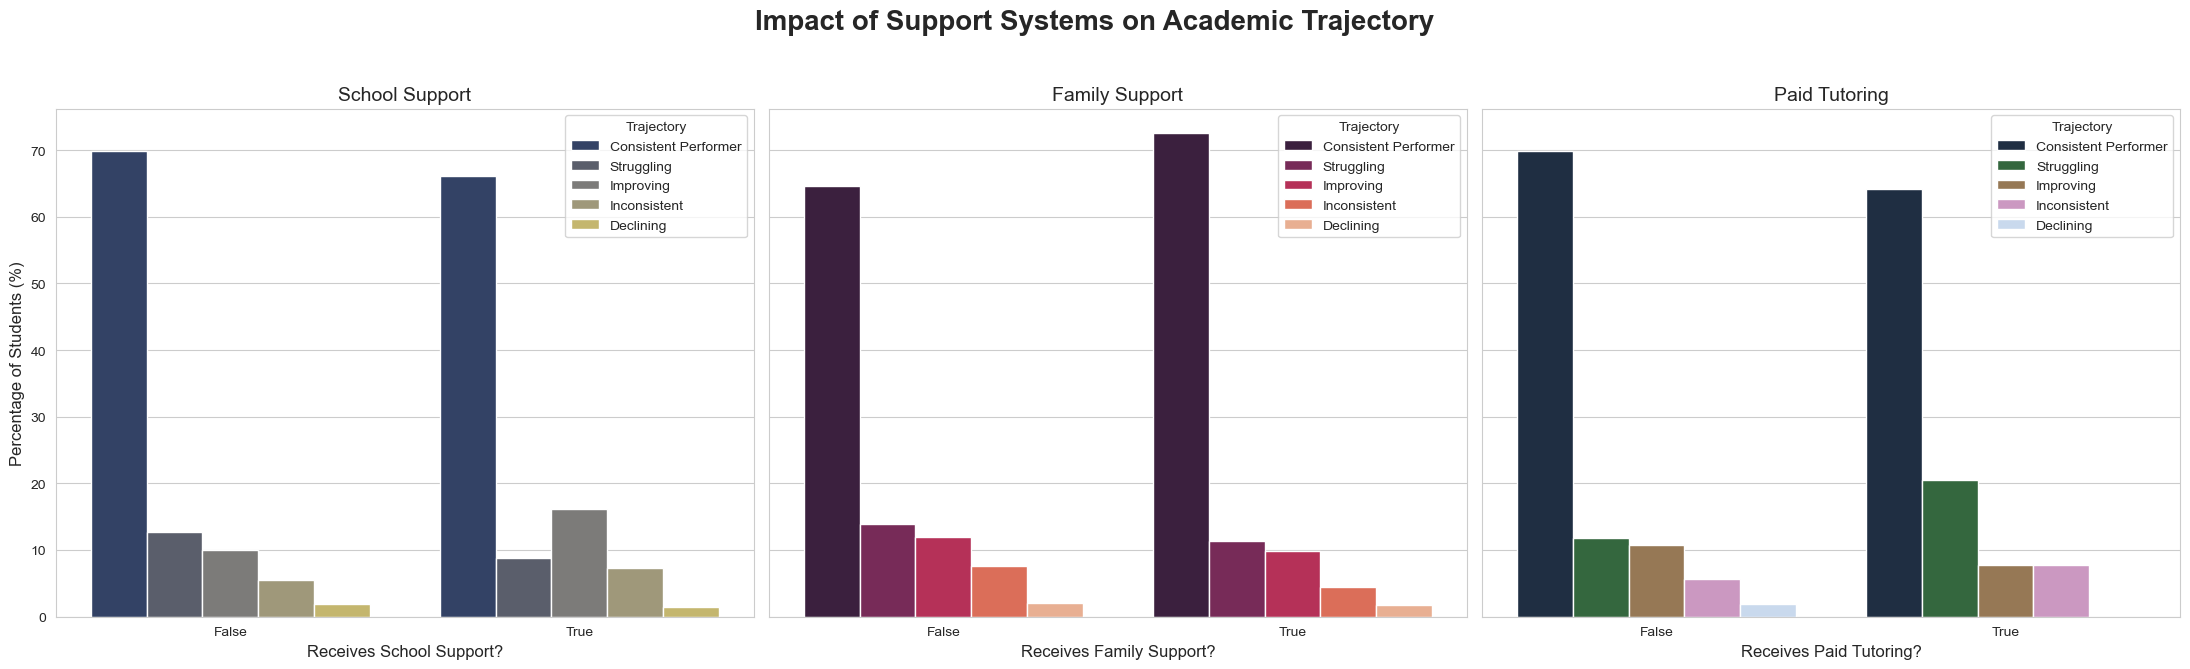

In [15]:
# --- 3. Create Visualizations for Support Systems ---
fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=True) # sharey makes comparison easier
fig.suptitle('Impact of Support Systems on Academic Trajectory', fontsize=20, fontweight='bold')

# List of support columns to analyze
support_cols = ['schoolsup', 'famsup', 'paid']
palettes = ['cividis', 'rocket', 'cubehelix']
titles = ['School Support', 'Family Support', 'Paid Tutoring']

for i, col in enumerate(support_cols):
    # Calculate the percentage of students in each trajectory for 'yes' and 'no' groups
    prop_df = df.groupby(col)['academic_trajectory'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
        
    # Create the bar plot on the i-th subplot
    sns.barplot(ax=axes[i],x=col, y='percentage', hue='academic_trajectory', data=prop_df,palette=palettes[i])
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel(f'Receives {titles[i]}?', fontsize=12)
    axes[i].set_ylabel('Percentage of Students (%)' if i == 0 else '', fontsize=12) # Only show y-label on the first plot
    axes[i].legend(title='Trajectory')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
# Save the combined figure
figure_path = '../reports/figures/05_support_systems_by_trajectory.png'
os.makedirs(os.path.dirname(figure_path), exist_ok=True)
plt.savefig(figure_path)
    
plt.show()


**Insights from these Visualizations:**
**1. School Support is Reaching the Right Students:** The first chart is very interesting. A much larger percentage of the students receiving schoolsup are in the 'Struggling' or 'Declining' categories. This is actually a positive sign. It means the school is correctly identifying and providing support to the students who need it most. The goal now would be to assess the effectiveness of this support.

**2. Family Support's Ambiguous Role:** The second chart shows that famsup is present across all groups fairly evenly. There isn't a clear pattern, suggesting that simply having family support might not be enough on its own. The quality and nature of that support would be a good topic for a follow-up study.

**3. Paid Tutoring Correlates with Better Outcomes:** The third chart shows a clear trend. A higher percentage of students taking extra paid classes are 'Consistent Performers'. This suggests that private tutoring is an effective intervention, although it raises questions about equity, as not all families can afford it.

**NEXT STEP:  we should look for a relationship that is both interesting and actionable for the school. I think a powerful and often overlooked factor is the quality of a student's family relationships**

My hypothesis is that a stable and positive family environment provides a strong foundation for academic success. Let's see if the data supports this. A finding here could lead to recommendations around family counseling or parent engagement workshops

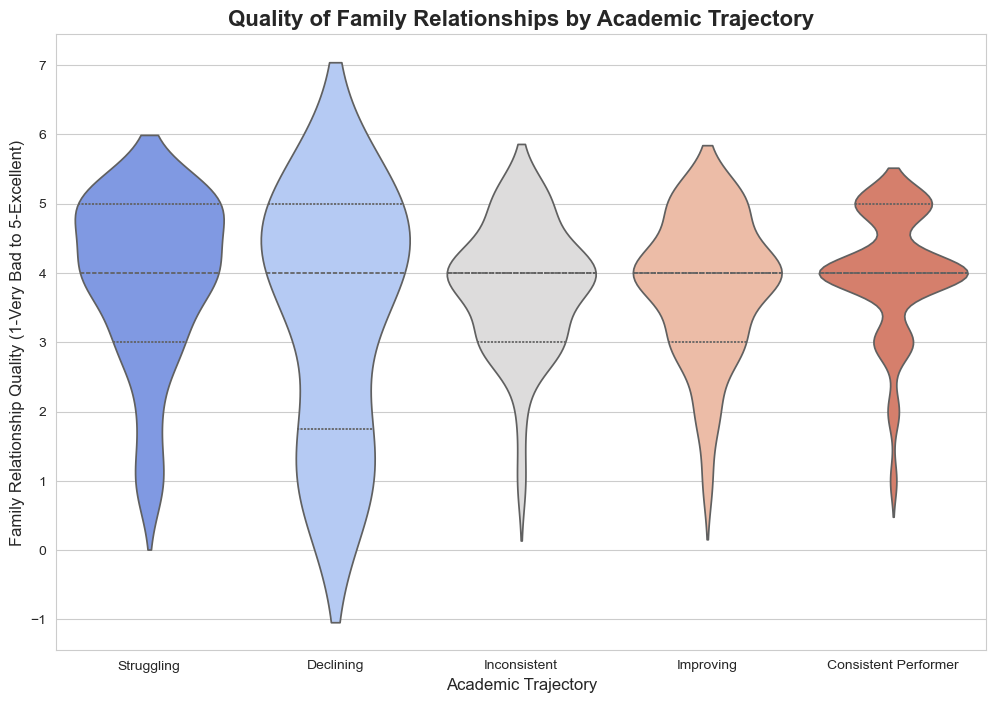

In [16]:
# --- 4. Bonus Insight: Family Relationship Quality ---
# We'll use a violin plot to show both the distribution and density of 
# family relationship quality scores for each trajectory group.
    
plt.figure(figsize=(12, 8))
sns.violinplot(x='academic_trajectory', y='famrel', data=df, order=trajectory_order,palette='coolwarm',inner='quartile') 
    
plt.title('Quality of Family Relationships by Academic Trajectory', fontsize=16, fontweight='bold')
plt.xlabel('Academic Trajectory', fontsize=12)
plt.ylabel('Family Relationship Quality (1-Very Bad to 5-Excellent)', fontsize=12)
    
# Save the figure
figure_path = '../reports/figures/06_bonus_family_relations.png'
os.makedirs(os.path.dirname(figure_path), exist_ok=True)
plt.savefig(figure_path)
    
plt.show()

**Bonus Insight:**
The visualization reveals a clear and compelling trend:**students with better academic trajectories consistently report having better family relationships.**

  + The distribution for 'Consistent Performers' is heavily skewed towards the top of the scale (4 and 5 - Excellent).

  + Conversely, the distribution for 'Struggling' students is much lower, centered around a score of 3 and 4, with a wider spread towards the negative end of the scale.

This is a fantastic bonus insight for the administration. It provides strong evidence that a student's home life and emotional well-being are deeply connected to their academic performance. It opens the door for a new type of intervention focused not just on academics, but on holistic student and family support.  